In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import StratifiedKFold 
from sklearn.decomposition import PCA
import os.path

<center> <h1 size=4>Data Analysis and Machine Learning on Porto Seguro's Safe Drive Prediction</h1></center>  
<center>Jiamin Wang (NUID:001289959)</center> 
<center>INFO 7245, Spring 2018, Northeastern University</center> 

**Abstract**

This study attempts to help Porto Seguro to predict the probability that a driver will initial an auto insurance claim in the next year. My project in the notebook dives into the data analysis and modeling for the Porto Seguro Kaggle competition in the Python environment. I used Pandas and associated libraries for most of the data manipulation. Furthermore, I used Scikit-learn and Tensorflow for the modeling. In data analysis part, I visualized different features to see how they relate to the target variable, explored multi-parameter interactions, and performed some feature engineering. For data modeling part, I have done a comparative analysis by implementing different machine learning and deep learning models. These models including Logistic Regression, Random Forests, Decision Tree, Support Vector Machine and Recurrent Neural Network. The result is that the prediction performance of machine learning models in this research is generally not very satisfactory, but the deep learning model with the appropriate parameters can greatly improve the accuracy of prediction. 

**Introduction**

Porto Seguro is one of Brazil's largest auto and homeowner insurance companies. Improving the accuracy of insurance claims benefits both customers and insurance companies. Inaccuracies in car insurance company's claim predictions raise insurance costs for good drivers and lower the price for risky ones. Better predictions increase car-ownership accessibility for safer drivers and allow car insurance companies to charge fair prices to all customers. What's more, better predictions can also lead to improved profits for insurance companies.
     In this research, I am challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year, with the purpose of providing a fairer insurance cost based on an individual's driving habits. 


In [2]:
#Read the train data
my_path = os.path.abspath(os.path.dirname("__file__"))

In [3]:
path = os.path.join(my_path, "train.csv")
with open(path) as f:
    train = pd.read_csv(f)

In [4]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


**Dataset and Features Introduction**

The training dataset contains 595212 labeled records, one per client. Each record consists of 57 features with unknown meaning, one client ID, and one target variable indicated whether the customer filed an insurance claim. In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., "ind", "reg", "car", "calc"). In addition, feature names include the postfix "bin" to indicate binary features and "cat" to indicate categorical features. Features without these designations are either continuous or ordinal. And values of "-1" indicate that the feature was missing from the observation. After analyzing, it can be distinguished that 17 of the 57 features are binary, 14 are categorical and the others are either continuous or ordinal. The target is binary and the dataset is strongly imbalanced: 3.65% is 1, the rest is 0.



<font size=6>1.Data cleaning part </font>

<font size=4>**(1) Features classify**</font>

Feature names include the postfix bin to indicate binary variable
<br>Feature names include the postfix cat to indicate categorical variable</br>
<br>Integer variables are ordinal variable</br>
<br>Float variables are numeric variable</br>

In [39]:
#Classifying the features
binary = []
categorical = []
ordinal = []
numeric = []

for f in train.columns:
    if ('bin' in f):
        binary.append(f)
    if 'cat' in f:
        categorical.append(f)
    if ('bin' not in f) & ('cat' not in f) & (f in train.dtypes[train.dtypes=='int64']) & (f not in ['target', 'id']):
        ordinal.append(f)
    if ('bin' not in f) & ('cat' not in f) & (f in train.dtypes[train.dtypes=='float64']):
        numeric.append(f)

In [40]:
#List binary variables, categorical variables, ordinal variables and numeric variables
print('Binary variables :' + ", ".join(str(x) for x in binary))
print('')
print('Categorical variables :' + ", ".join(str(x) for x in categorical))
print('')
print('Ordinal variables :' + ", ".join(str(x) for x in ordinal))
print('')
print('Numeric variables :' + ", ".join(str(x) for x in numeric))

Binary variables :ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin

Categorical variables :ps_ind_02_cat, ps_ind_04_cat, ps_ind_05_cat, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat

Ordinal variables :ps_ind_01, ps_ind_03, ps_ind_14, ps_ind_15, ps_car_11, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14

Numeric variables :ps_reg_01, ps_reg_02, ps_reg_03, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03


<font size=4>**(2) Missing values**</font>

Some values in the input datasets were missing (marked with -1). Firstly, I used missingno, a missing data visualization module for Python to find them intuitively. 

In [41]:
import missingno

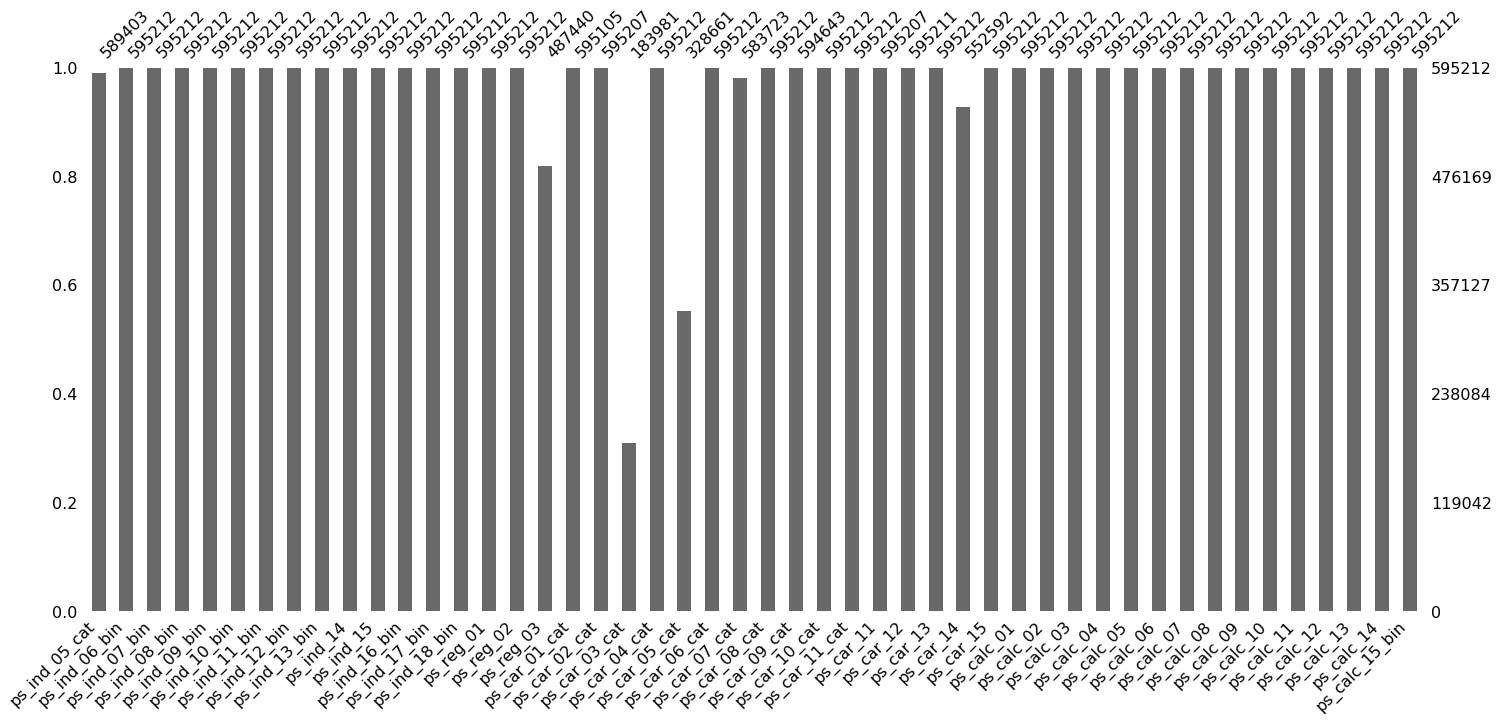

In [42]:
missingno.bar(train.replace(-1, np.NaN).iloc[:,6:54])

In [43]:
#Replace -1 with NaN, as they are missing values
train_nan = train.replace(-1, np.NaN)

In [44]:
#Print missing values percentage
missingvalues_num = train_nan.isnull().sum().sort_values(ascending=False)
print(missingvalues_num[missingvalues_num > 0] / train_nan.shape[0] * 100)

ps_car_03_cat    69.089837
ps_car_05_cat    44.782531
ps_reg_03        18.106490
ps_car_14         7.160474
ps_car_07_cat     1.930237
ps_ind_05_cat     0.975955
ps_car_09_cat     0.095596
ps_ind_02_cat     0.036290
ps_car_01_cat     0.017977
ps_ind_04_cat     0.013945
ps_car_02_cat     0.000840
ps_car_11         0.000840
ps_car_12         0.000168
dtype: float64


From above we can see that there are 2 variables that have more than 40% missing values:**ps_car_03_cat** and **ps_car_05_cat**. We will drop them later because they do not provide enough information.

<font size=4>**(3) Columns Correlations**</font>

After classifying 57 features into four types of variable: binary variable, categorical variable, ordinal variable and numeric variable, I analysis the columns correlations for each of these variables. 

In [45]:
def columns_correlation_plot(title, dataframe, columns):
    colormap = plt.cm.Oranges
    plt.figure(figsize=(16,16))
    plt.title(title.title() + ' variables correlation', y=1)
    sns.heatmap(dataframe[columns].corr(), cmap=colormap, annot=True)

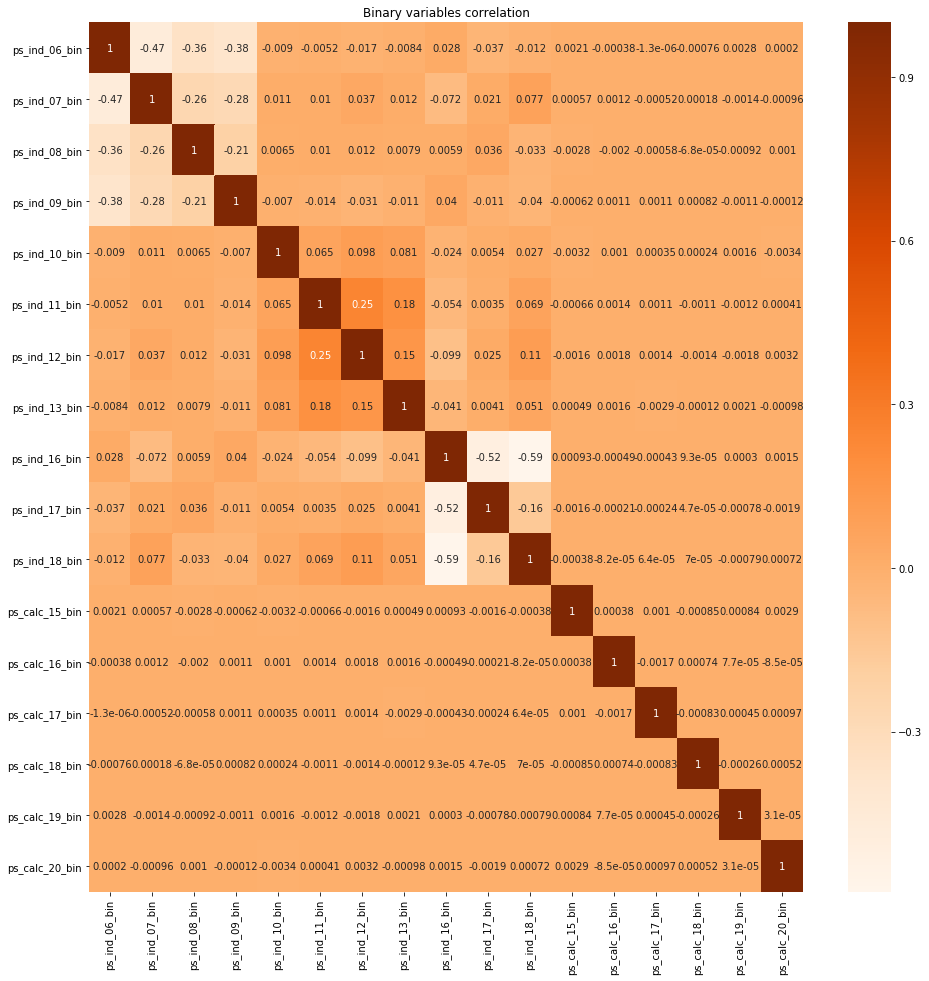

In [46]:
#Binary features correlation
columns_correlation_plot('binary', train, binary)

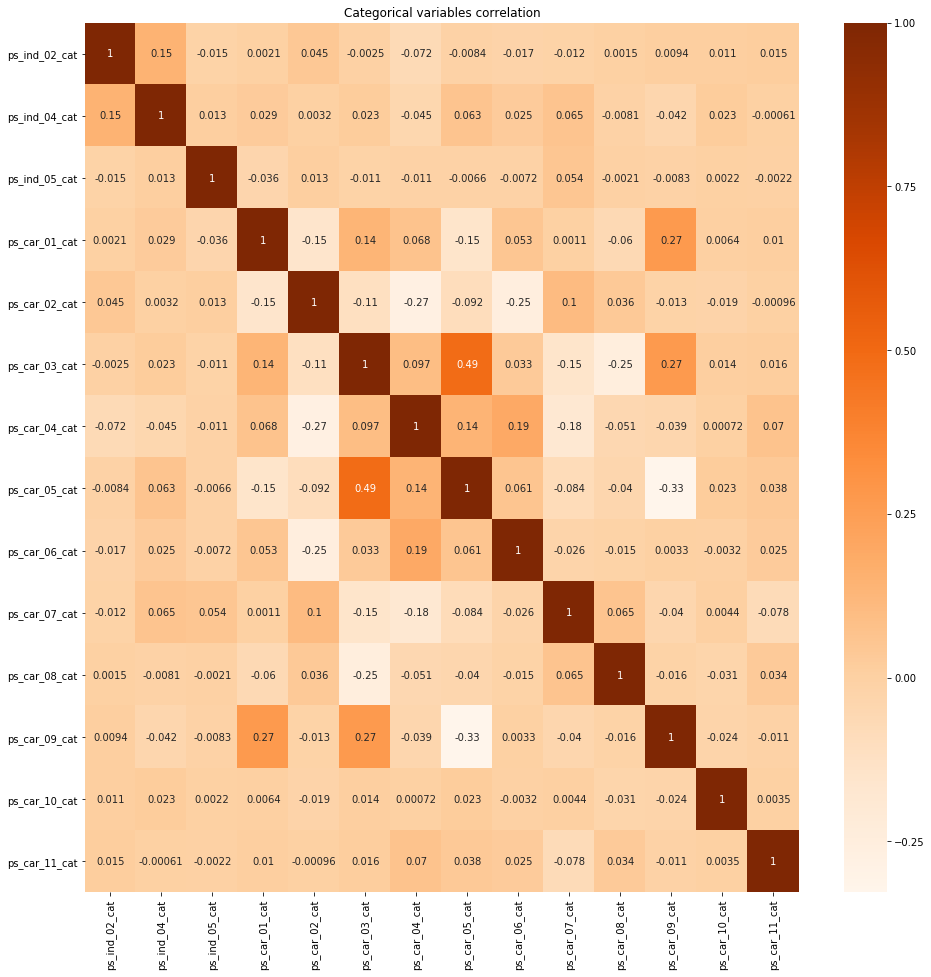

In [47]:
#categorical features correlation
columns_correlation_plot('categorical', train, categorical)

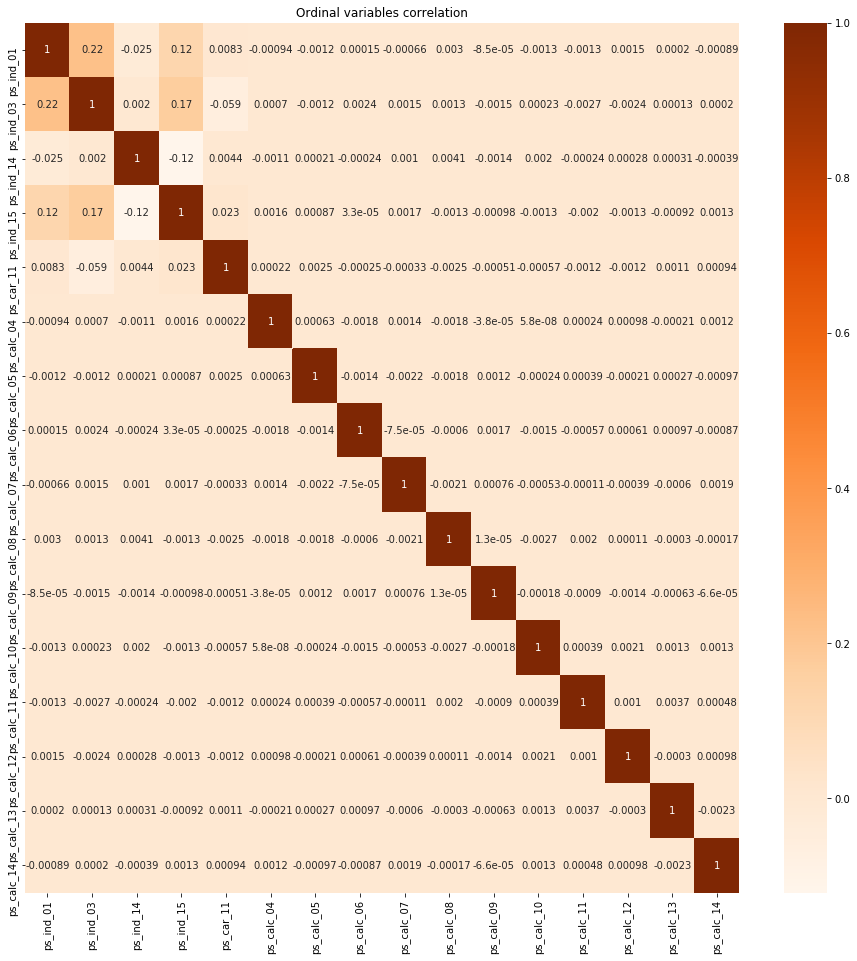

In [48]:
#Ordinal features correlation
columns_correlation_plot('ordinal', train, ordinal)

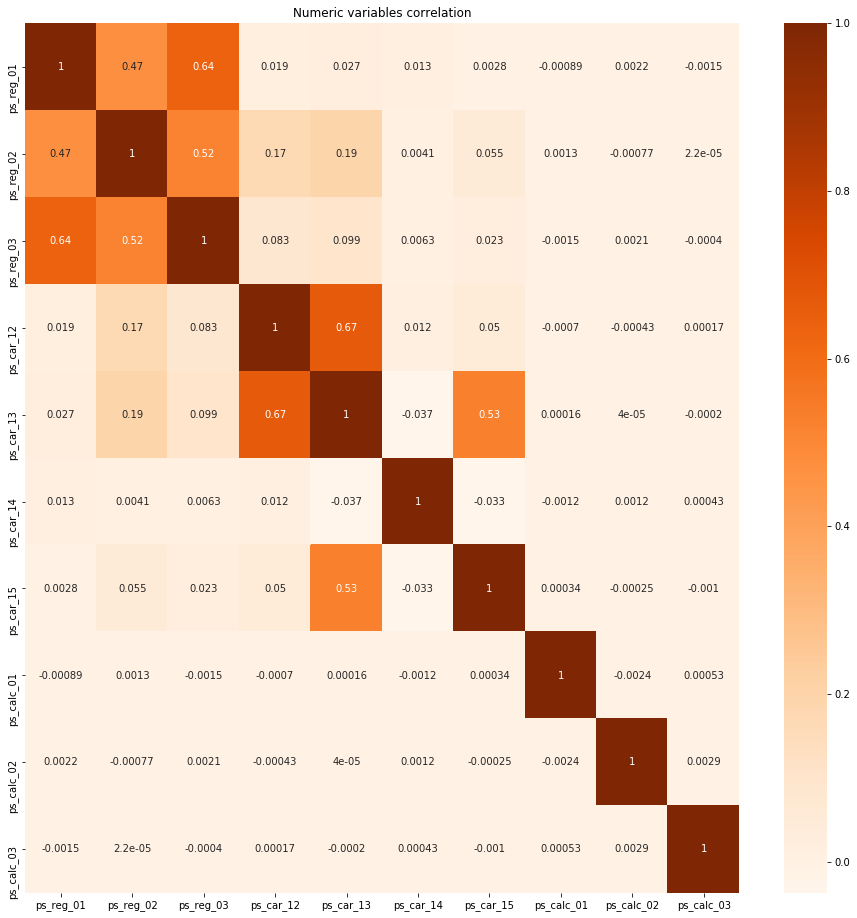

In [49]:
#Numeric features correlation
columns_correlation_plot('numeric', train, numeric)

From the above figures, if the coefficient is higher than **0.5**, we can choose them as highly correlated columns.

Correlated columns are:

**ps_reg_01 and ps_reg_03**
<br>**ps_reg_02** and **ps_reg_03**</br>
<br>**ps_car_12** and **ps_car_13**</br>
<br>**ps_car_13** and **ps_car_15**</br>

**Binary features**

From the first plot we can notice that binary features are not correlated. However, they may have other characteristics which make us think they are not relevant. For the further exploration, I checked the 0/1 ratio of each binary feature.

In [50]:
binary_1_ratio = (np.mean(train[binary]))
binary_0_ratio = (1-binary_1_ratio)

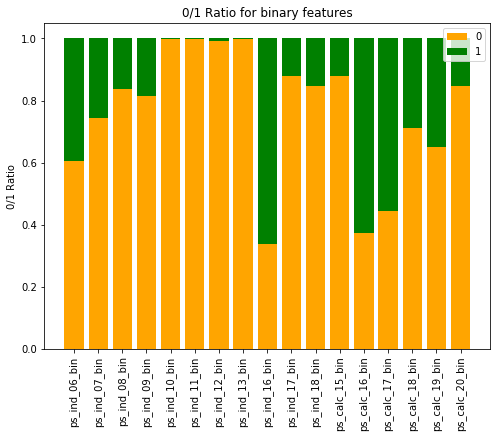

In [51]:
#Plot ratio of all binary features
plt.figure(figsize=(8,6))

x_pos = np.arange(len(binary))
p1 = plt.bar(x_pos, binary_0_ratio, color = 'orange',align='center',label='0')
p2 = plt.bar(x_pos, binary_1_ratio, color = 'green', align='center',bottom = binary_0_ratio,
             label='1')
plt.xticks(x_pos, binary)
plt.xticks(rotation='vertical')

plt.ylabel('0/1 Ratio')
plt.title('0/1 Ratio for binary features')
plt.legend((p1[0], p2[0]), ('0', '1'))

plt.show()

From the above visualization, we can see that the distribution of 0 and 1 is extremely uneven for **ps_ind_10_bin**, **ps_ind_11_bin**, **ps_ind_12_bin** and **ps_ind_13_bin**. They are not relevent features since they do not provide much useful information. These features will be deleted later.

**Categorical variables**

Here we will explore distinct elements for each categorical variable.

In [52]:
distinct_elements = []
for e in categorical:
    distinct_elements.append(len(train[e].unique()))

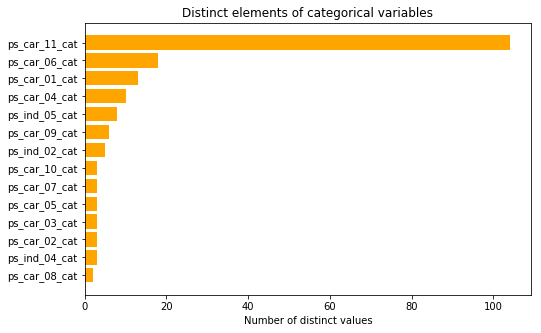

In [53]:
#PLot distinct elements of all categorical variables
idx= np.argsort(distinct_elements)
bar_dist_elem = np.asarray(distinct_elements)[idx]
bar_cat = np.asarray(categorical)[idx]

plt.figure(figsize=(8,5))

y_pos = np.arange(len(bar_cat))
plt.barh(y_pos, bar_dist_elem, align='center', color='orange')
plt.yticks(y_pos, bar_cat)
plt.xlabel('Number of distinct values')
plt.title('Distinct elements of categorical variables')

plt.show()

**ps_car_11_cat** has the most distinct categories but it is manageable.

<font size=4>**(4) Dimension reduction**</font>

Based on the above exploration, we can reduce the dimension initially by reducing the following columns:

high missing values columns: **ps_car_03_cat**, **ps_car_05_cat**

irrelevant columns: **ps_ind_10_bin**, **ps_ind_11_bin**, **ps_ind_12_bin**, **ps_ind_13_bin**

In [54]:
# Dropping irrelevant features from the dataframe
columns_to_drop = ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_03_cat', 'ps_car_05_cat']
train_drop = train
train_drop.drop(columns_to_drop, inplace=True, axis=1)

In [55]:
#Removing the irrelevant features names from the lists
for e in columns_to_drop:
    if e in binary:
        binary.remove(e)
    elif e in ordinal:
        ordinal.remove(e)
    elif e in categorical:
        categorical.remove(e)
    elif e in numeric:
        numeric.remove(e)

<font size=4>**(5) Treating missing variables**</font>

Solution:

Replace the missing values with the mode for **categorical** and **binary** variables.

Replace the missing values with the mean for **numeric** and **ordinal** variables.

In [56]:
incomplete = train.columns[train.eq(-1).any()]
cols_with_na=[]
for c in incomplete:
    cols_with_na.append(c)

In [57]:
def treat_missng_values(df, cols_with_na, categorical, binary, numeric, ordinal):
    for c in cols_with_na:
        if (c in categorical) or (c in binary):
            df.loc[df[c]==-1,c] = df[df[c]!=-1][c].mode()[0] 
        if (c in numeric) or (c in ordinal):
            df.loc[df[c]==-1,c] = df[df[c]!=-1][c].mean() 
    return df

train_no_missing = treat_missng_values(train_drop, cols_with_na, categorical, binary, 
                                       numeric, ordinal)

In [58]:
#Check if there is still any missing values 
train_no_missing.eq(-1).any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_04_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03        False
ps_calc_04        False
ps_calc_05        False
ps_calc_06        False
ps_calc_07        False
ps_calc_08        False
ps_calc_09      

<font size=6>2.Data transformation part </font>

A one-hot encoding consists of representing states using for each a value whose binary representation has only a single digit 1. A one-hot encoding function can be defined as the function that takes a z vector as input and redefines the largest value of z to 1 and all other values of z to 0. For example, in a one-hot encoding, for three possible states, the binary values 001, 010, and 100 can be used. When using machine learning algorithms and deep learning algorithms, it is important to use a one hot encoding in order to reduce the noise while getting the splits for most useful categories.

To make categorical variables meaningful to fit the machine learning algorithm, here we will
transform each categorical column into multiple binary columns.

In [59]:
train_data = pd.get_dummies(train_no_missing, columns=categorical)
train_data.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_14,ps_ind_15,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,2,5,0,1,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
1,9,0,1,7,0,0,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,13,0,5,9,0,0,1,0,0,12,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,2,1,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,1
4,17,0,0,0,1,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#Checking the dataset after data transformation.
train_data.describe()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_14,ps_ind_15,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,4.423318,0.393742,0.257033,0.163921,0.185304,0.012451,7.299922,...,0.005978,0.003483,0.002493,0.004788,0.020231,0.007468,0.012330,0.003533,0.040762,0.142946
std,4.293678e+05,0.187401,1.983789,2.699902,0.488579,0.436998,0.370205,0.388544,0.127545,3.546042,...,0.077084,0.058912,0.049870,0.069031,0.140791,0.086094,0.110354,0.059336,0.197738,0.350018
min,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.488027e+06,1.000000,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,4.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#train_data.to_csv('/Users/ouyoshimisatoshi/Desktop/train_data.csv')

<font size=6>2.EAD </font>

In this part, we will visualize the distributions of each of the variables and the relationship between each individual feature against the target. And also check the ratio of insurance claims within the observations.

To gauge the complexity of the dataset and search for any obvious dependencies between feature values and claim-making, I visualized the distributions of each of the variables and the relationship between each individual feature against the target. Although at first these plots might not tell us much, it is important to have as a reference later on: when an interesting insight related to a feature emerges, it is useful to refer back to the distribution of that feature. These plots and detailed documentation are in the above links.

**(1) Binary Features**

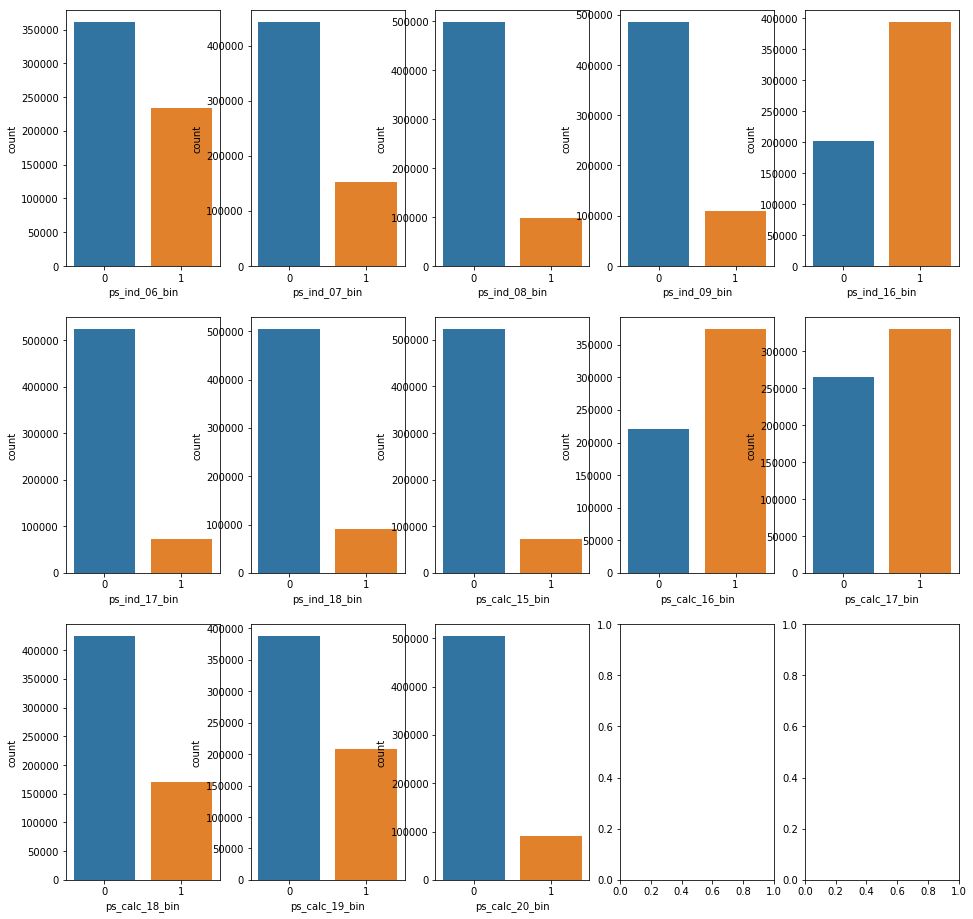

In [27]:
# 1.Binary Features distribution
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(16,16))
for i, col in enumerate(binary):
    sns.countplot(x = col, data=train_drop, ax=axs.ravel()[i])

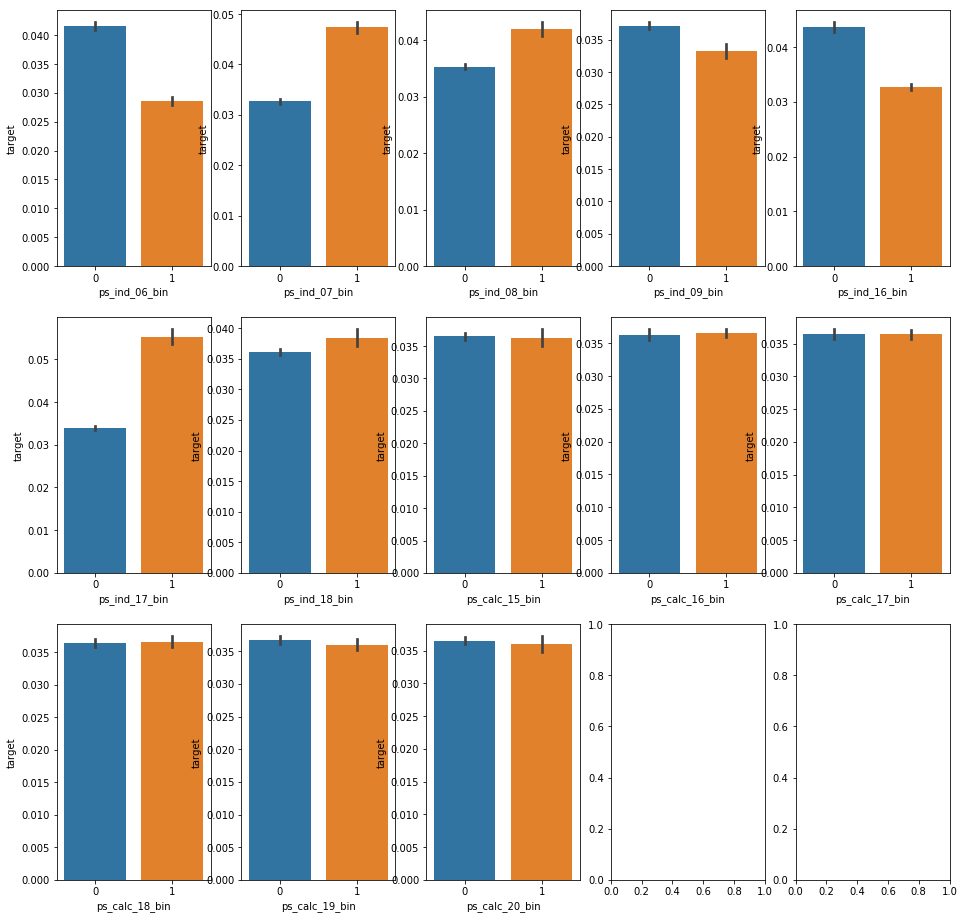

In [29]:
# 2.Relationship between each binary feature against the target.
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(16,16))
for i, col in enumerate(binary):
    sns.barplot(x = col, y = 'target', data = train_drop, ax=axs.ravel()[i], )

**(2) Categorical Features**

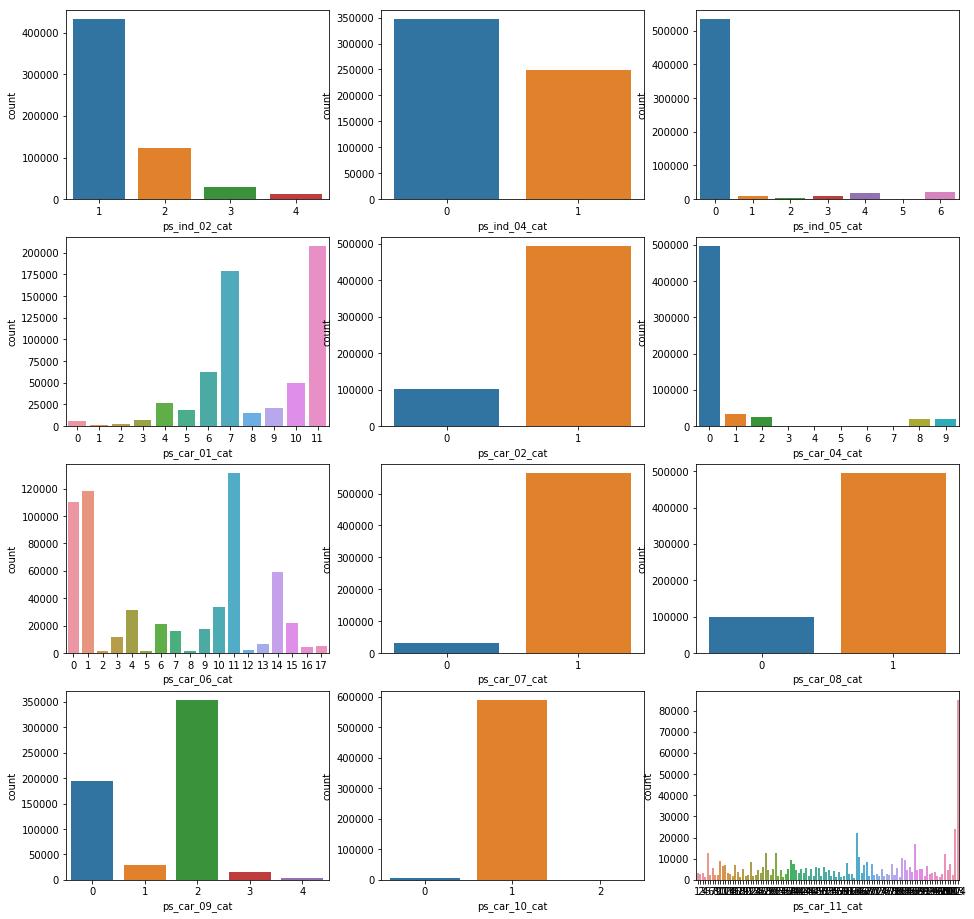

In [26]:
# 1.Categorical Features distribution
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16,16))
for i, col in enumerate(categorical):
    sns.countplot(x = col, data=train_drop, ax=axs.ravel()[i])

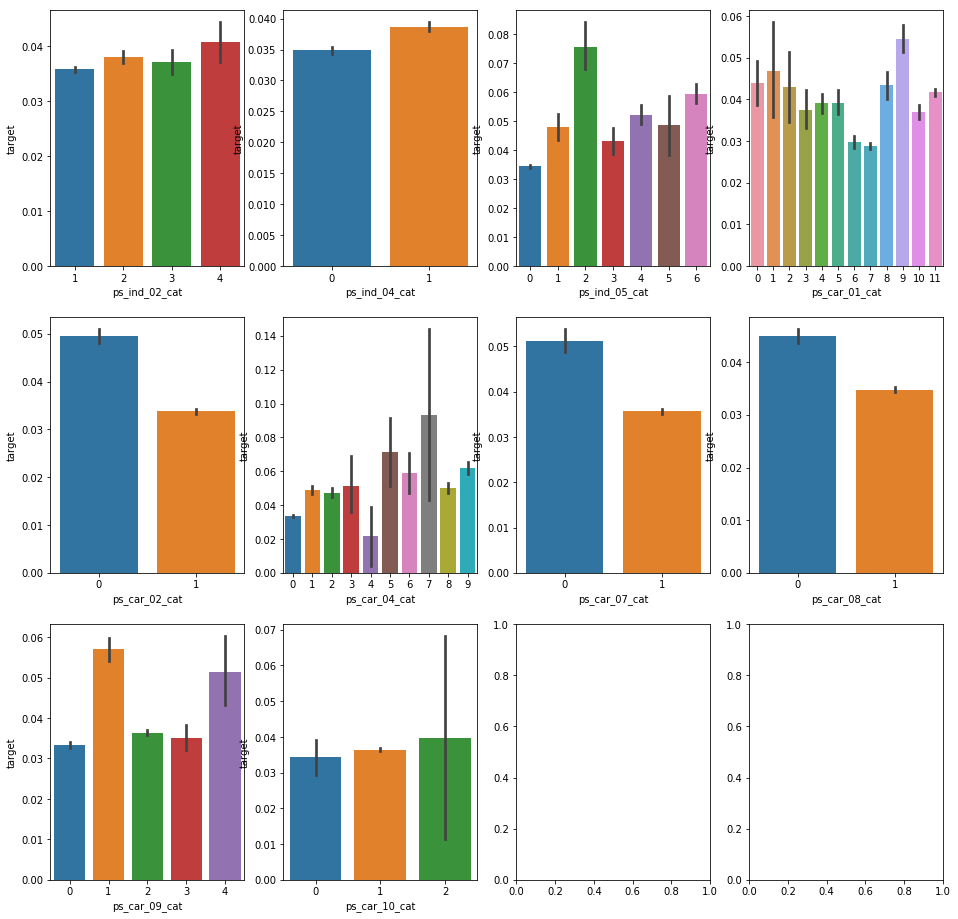

In [34]:
# 2.Relationship between each categorical feature against the target.
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,16))
categorical1=categorical
# handle these variables seperately
categorical1.remove('ps_car_06_cat')
categorical1.remove('ps_car_11_cat')
for i, col in enumerate(categorical1):
    sns.barplot(x = col, y = 'target', data = train_drop, ax=axs.ravel()[i])

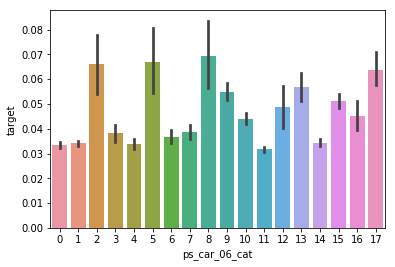

In [35]:
sns.barplot(x = 'ps_car_06_cat', y = 'target', data = train_drop)

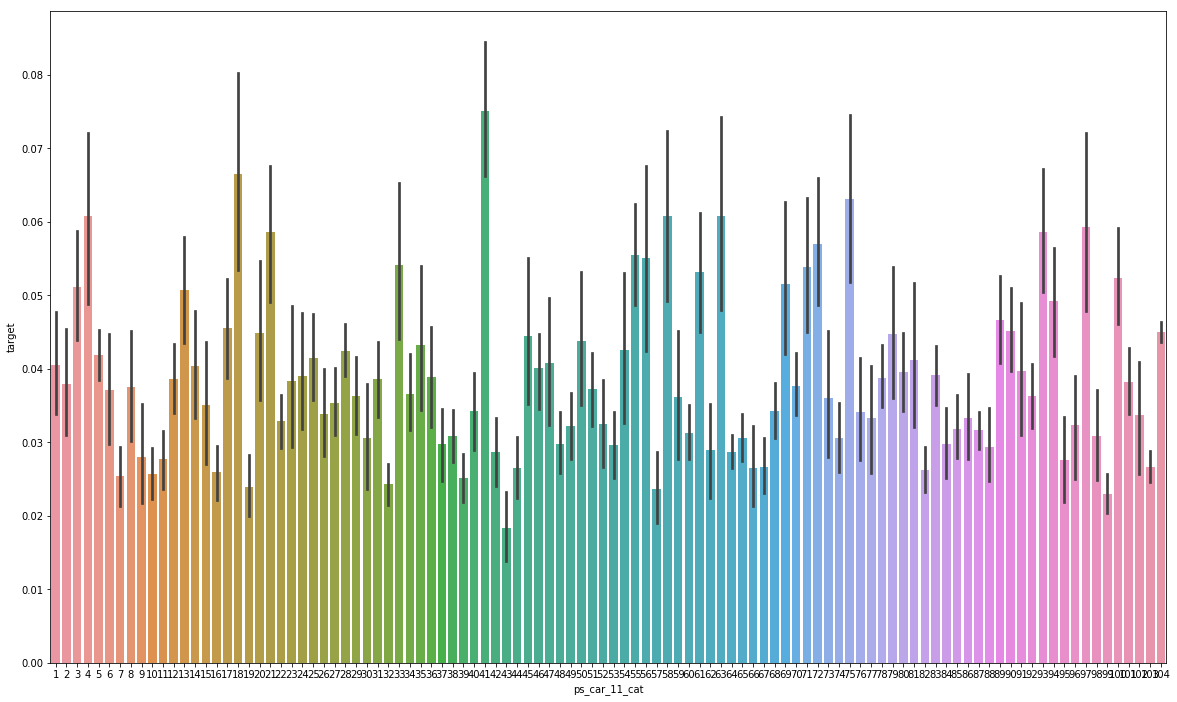

In [36]:
plt.figure(figsize=(20,12))
sns.barplot(x = 'ps_car_11_cat', y = 'target', data = train_drop)

**(3) Ordinal Features**

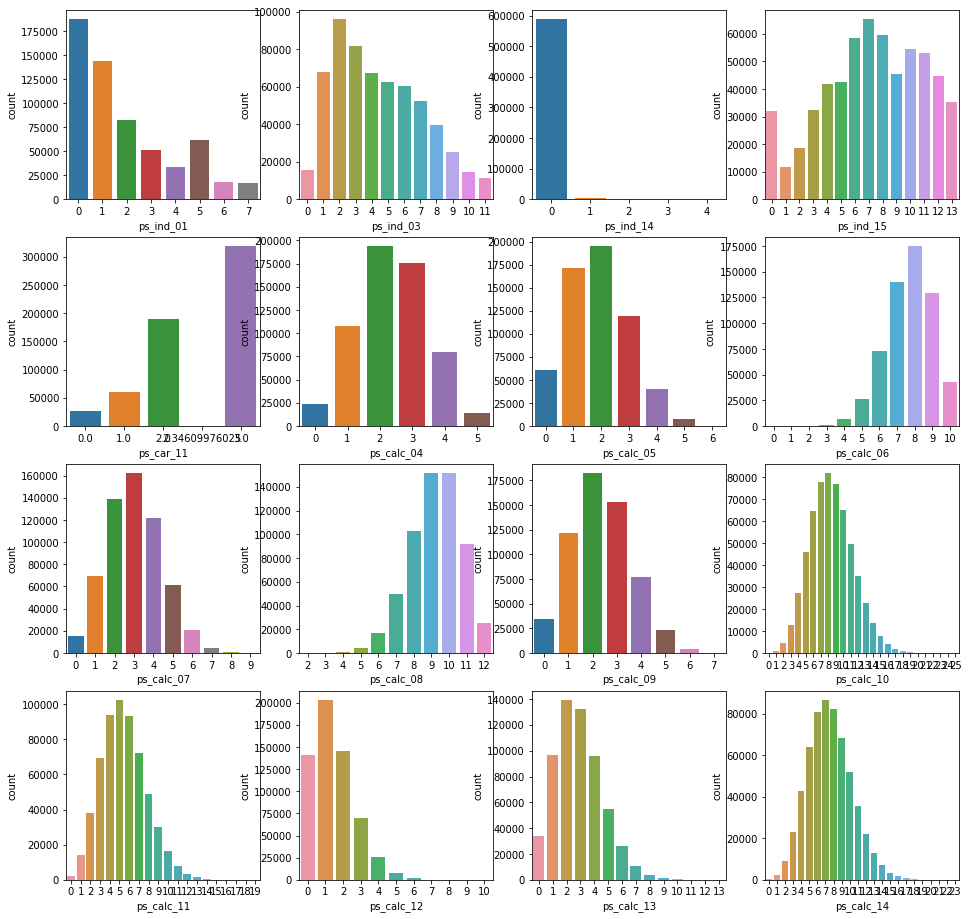

In [27]:
# 1.Ordinal Features distribution
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16,16))
for i, col in enumerate(ordinal):
        sns.countplot(x = col, data=train_drop, ax=axs.ravel()[i])

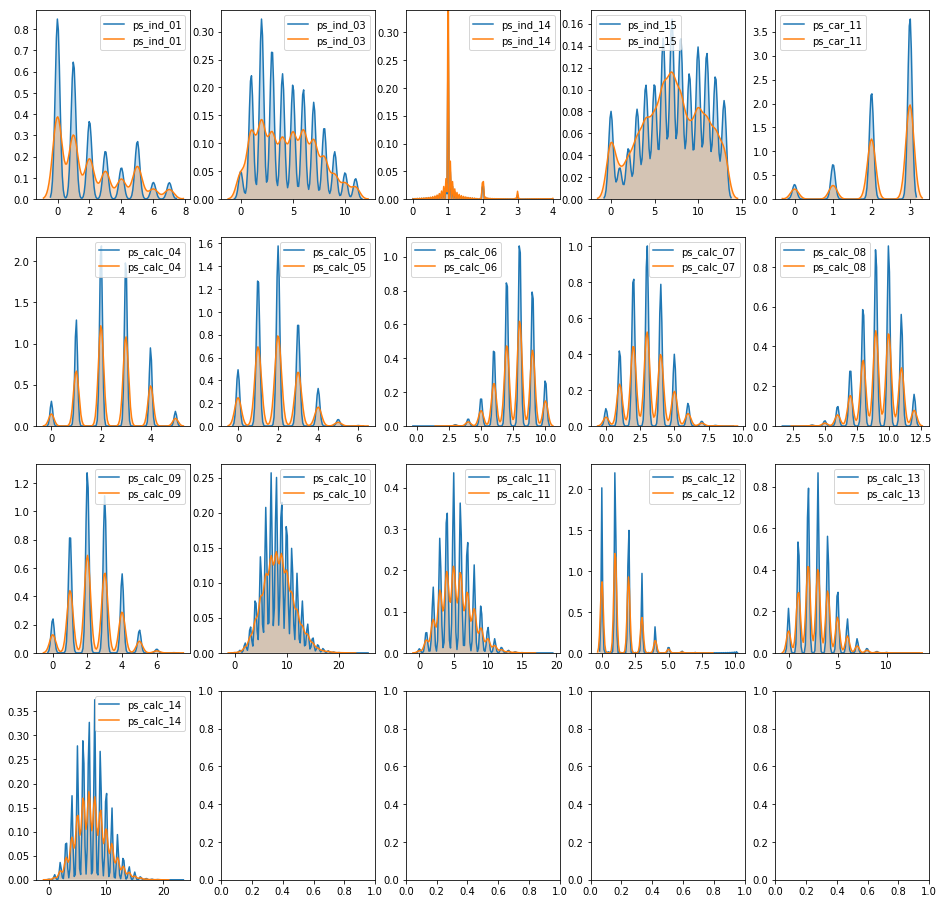

In [40]:
# 2.Relationship between each ordinal feature against the target.（kernel density estimation）
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(16,16))
for i, col in enumerate(ordinal):
    sns.kdeplot(data = train_drop[train_drop['target'] == 0][col], 
                ax=axs.ravel()[i], shade=True)
    sns.kdeplot(data = train_drop[train_drop['target'] == 1][col], 
                ax=axs.ravel()[i], shade=True)

**(4) Numeric Features**

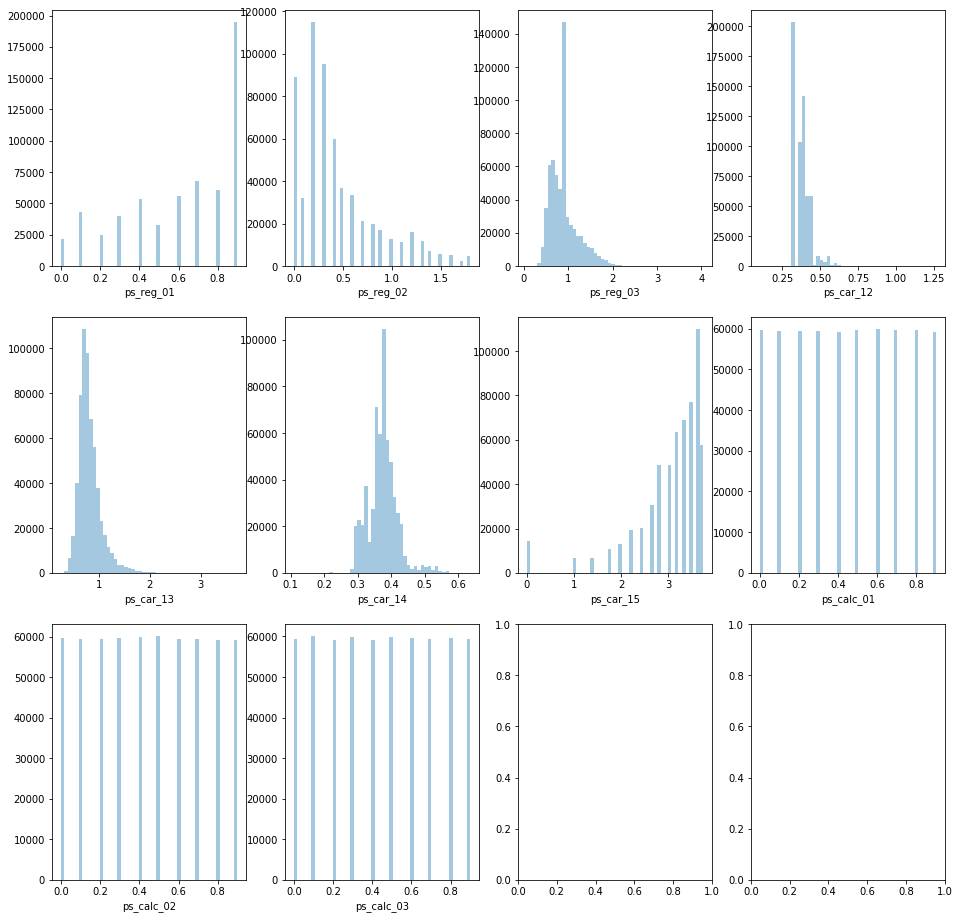

In [37]:
# 1.Numeric Features distribution
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,16))
for i, col in enumerate(numeric):
    sns.distplot(a = train_drop[~train_drop[col].isnull()][col],
                 kde= False,  ax=axs.ravel()[i])

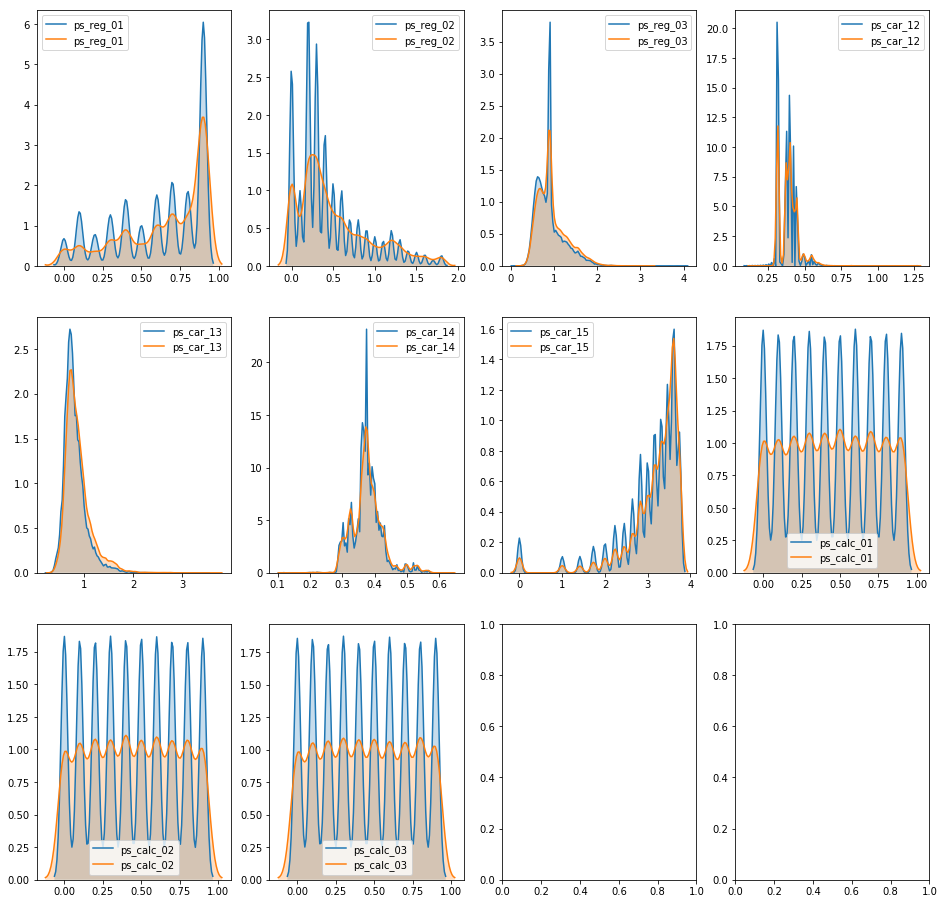

In [41]:
# 2.Relationship between each numeric feature against the target.
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,16))
for i, col in enumerate(numeric):
    sns.kdeplot(data = train_drop[train_drop['target'] == 0][col], ax=axs.ravel()[i], shade=True)
    sns.kdeplot(data = train_drop[train_drop['target'] == 1][col], ax=axs.ravel()[i], shade=True)

**(5) Imbalanced Dataset**

Checking the target column to see how the dataset is balanced.

In [43]:
target_group = train_data.groupby(['target']).size()
target_count = target_group.to_frame()
target_count = target_count.reset_index()
target_count = target_count.rename({},{0: "count"})
target_count

,target,count
0,0,573518
1,1,21694


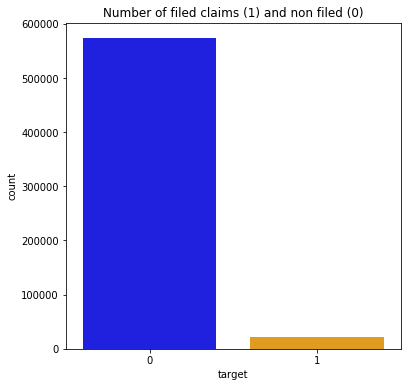

In [49]:
#Target visualization
colors = ['blue','orange']
plt.figure(1, figsize=(6, 6))
ax = sns.barplot(x="target", y="count", data=target_count, ci=None, palette=colors)
plt.title("Number of filed claims (1) and non filed (0)")

plt.show()

In [47]:
np.mean(train_data["target"])

0.036447517859182946

We only have about 3.6% of filed claims for that policy holder. This is a highly imbalanced dataset. This is not surprising since people are not willing to change file insurance every year. In general, they do so when they acquire a new vehicle. Since the percentage of file claims is very low, we can understand why the company is having a hard time predicting it.

<font size=6>3.PCA </font>

**Feature scaling**

Scale the features to better fit the models.

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.drop(['id','target'], axis=1))
y_train = train_data['target'].values.astype(np.int8)

In [60]:
target_names = np.unique(y_train)
pca = PCA(n_components=170, svd_solver='full', random_state=2018)
X_pca = pca.fit_transform(X_train)

In [61]:
#Explained Variance
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())
n = 10
print('Individual variance contributions (for the first ' + str(n) +
      ' components):')
for j in range(n):
    print(pca.explained_variance_ratio_[j])

Explained variance: 0.9709
Individual variance contributions (for the first 10 components):
0.0281384337914
0.016588750749
0.0148826857456
0.0139824044098
0.0127819606696
0.01166337618
0.0111682914016
0.0107850321112
0.010638782699
0.0103941242836


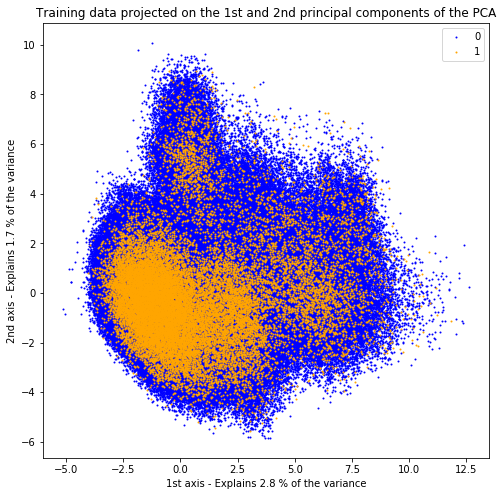

In [62]:
#Plot
plt.figure(1, figsize=(8, 8))
colors = ['blue', 'orange']
for i in target_names:
    plt.scatter(X_pca[y_train == i, 0], X_pca[y_train == i, 1], 
                color=colors[i], s=1, label=i)
plt.legend()
plt.title("Training data projected on the 1st and 2nd principal components of the PCA")
plt.xlabel("1st axis - Explains %.1f %% of the variance" % 
           (pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("2nd axis - Explains %.1f %% of the variance" % 
           (pca.explained_variance_ratio_[1] * 100.0))
   
plt.show()

Based on the above analysis, we can see that it is impossible to differentiate 0s and 1s with the 1st and 2nd principal components of a PCA. And we'd  better go with the 212 columns we got.

# License
This project is licensed under the MIT License - see the file [LICENSE.md](https://github.com/JiaminWangM/Research-Notebook/blob/master/LICENSE) for details

# Citation
Chris Mehrvarz Copyright 2008-2016, Porto_Seguro [Source code](https://github.com/mehrvch/Porto_Seguro/blob/master/ipynb/1_EDA.ipynb)

Zakarya Ali, ENSAE Project - Kaggle competition Porto Seguro’s Safe Driver Prediction [Source code](https://github.com/zakaryaxali/kaggle-porto_seguro/blob/master/kaggle-porto_seguro_nn_v01.ipynb)